In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import datetime
# 그래프에서 한글 깨짐 방지
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve,roc_auc_score,precision_recall_curve
from sklearn.ensemble import RandomForestClassifier , StackingClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,Lasso
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import cross_val_score,GridSearchCV

# 한글 깨짐 방지
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'malgun Gothic'

In [2]:
train = pd.read_csv('./Dataset/Undersampling/OSS_0.33_train.csv', encoding='euc-kr')
test = pd.read_csv('./Dataset/Undersampling/OSS_0.33_test.csv', encoding='euc-kr')

In [5]:
def vif(data):
    import pandas as pd
    from statsmodels.stats.outliers_influence import variance_inflation_factor

    # VIF 출력을 위한 데이터 프레임 형성
    vif = pd.DataFrame()

    # VIF 값과 각 Feature 이름에 대해 설정
    vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(len(data.columns))]
    vif["features"] = data.columns

    # VIF 값이 높은 순으로 정렬
    vif = vif.sort_values(by="VIF Factor", ascending=False)
    vif = vif.reset_index().drop(columns='index')

    return vif


In [3]:
X_train_sum=train[['유동자산회전률', '총자산대비잉여현금흐름','자기자본구성비율', 'log자산총계','자기자본회전률', '순운전자본회전률', '자기자본증가율', '총자본증가율', '총자산대비현금흐름', '총자본투자효율']]
y_train = train[['t-1감사의견코드']]
X_test_sum=test[['유동자산회전률', '총자산대비잉여현금흐름','자기자본구성비율', 'log자산총계','자기자본회전률', '순운전자본회전률', '자기자본증가율', '총자본증가율', '총자산대비현금흐름', '총자본투자효율']]
y_test = test[['t-1감사의견코드']]

In [6]:
vif(X_train_sum)

,VIF Factor,features
0,2.837804,순운전자본회전률
1,2.391544,유동자산회전률
2,1.387920,총자산대비잉여현금흐름
3,1.365344,자기자본회전률
4,1.354367,자기자본구성비율
5,1.288543,총자본증가율
6,1.248266,총자본투자효율
7,1.223567,log자산총계
8,1.164314,총자산대비현금흐름
9,1.118034,자기자본증가율


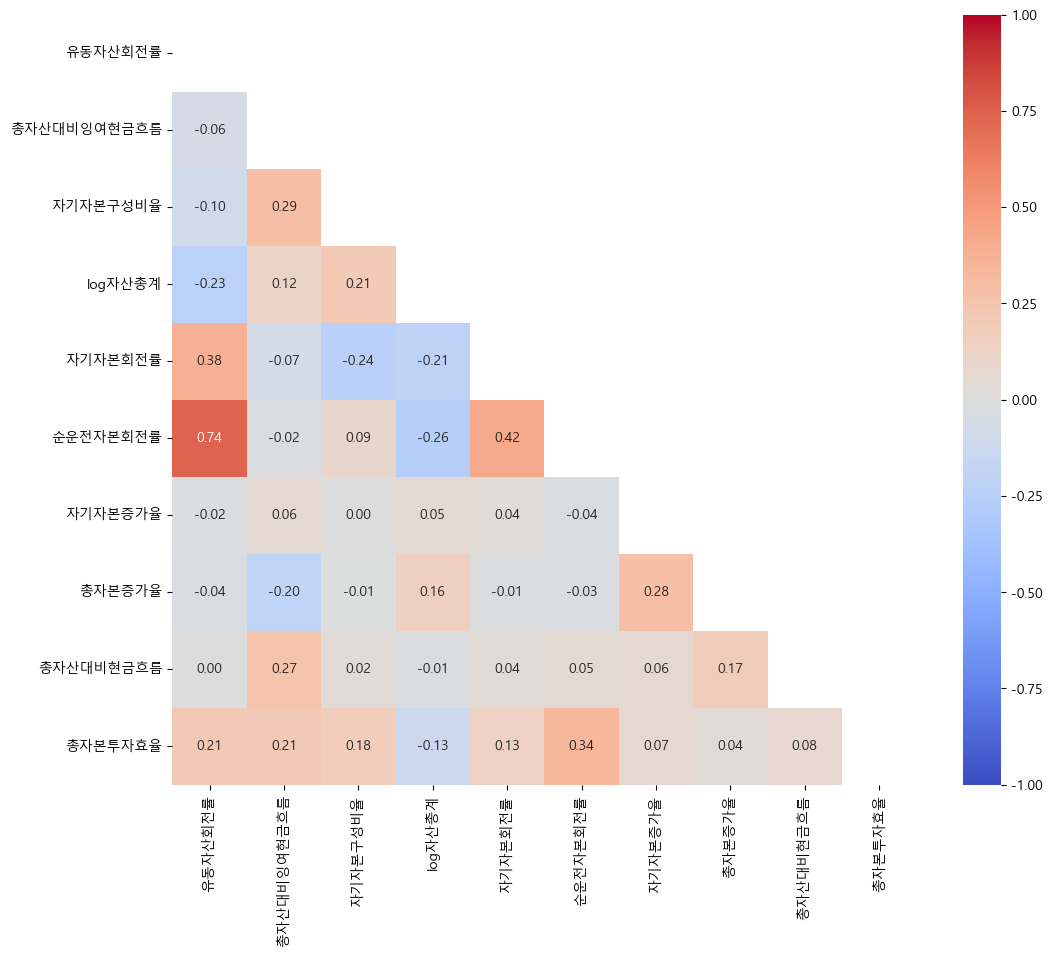

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 히트맵을 그릴 데이터 프레임 준비
data = X_train_sum.corr()

# 반만 히트맵 그리기
plt.figure(figsize=(12, 10))  # 그림 크기 설정 (조정 가능)
mask = np.triu(np.ones_like(data, dtype=bool))
sns.heatmap(data, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, mask=mask)

# 그래프 보여주기 (반만 나오게 그리기)
plt.show()


---
---
- Logistic Regression
- Random Forest
- XGBoost
- LightGBM

---
---
# Stacking

In [ ]:
# !pip install CatBoost
# !pip install pytorch_tabnet

                                              0.0/44.5 kB ? eta -:--:--
     ---------------------------------------- 44.5/44.5 kB ? eta 0:00:00
                                              0.0/172.3 MB ? eta -:--:--
                                             1.6/172.3 MB 50.9 MB/s eta 0:00:04
                                             4.2/172.3 MB 52.5 MB/s eta 0:00:04
     -                                       6.8/172.3 MB 54.5 MB/s eta 0:00:04
     -                                       8.4/172.3 MB 53.4 MB/s eta 0:00:04
     --                                      9.6/172.3 MB 43.9 MB/s eta 0:00:04
     --                                     10.5/172.3 MB 43.5 MB/s eta 0:00:04
     --                                     10.5/172.3 MB 43.5 MB/s eta 0:00:04
     --                                     13.1/172.3 MB 34.4 MB/s eta 0:00:05
     ---                                    15.6/172.3 MB 32.7 MB/s eta 0:00:05
     ---                                    17.7/172.3 MB 32.7


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

In [14]:
# 서브모델 및 메타모델 설정

submodels = [
    # LogisticRegression(C=  0.2335, class_weight='balanced', max_iter=10, penalty='l2', random_state=0, solver='sag'),
    RandomForestClassifier(criterion='entropy',n_estimators=200, random_state=0, max_depth=25, min_samples_leaf=15, max_features='auto', class_weight='balanced'),
    XGBClassifier(max_depth=8, learning_rate=0.09,n_estimators=100, random_state=0),
    LGBMClassifier(n_estimators=100, random_state=0, learning_rate=0.082, max_depth=14, class_weight='balanced')
    # CatBoostClassifier(iterations=120, random_state=0, verbose=0, cat_features=categorical_feature, depth=10, learning_rate=0.1)
    # SVC(probability=True, random_state=0)

]

meta_model = LGBMClassifier()

In [15]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 서브모델 및 메타모델을 활용한 스태킹 앙상블 함수
def stacking_ensemble(submodels, meta_model, X_train, y_train, X_test, y_test, n_folds=5):
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=0)

    meta_features_train = np.zeros((len(X_train), len(submodels)))
    meta_features_test = np.zeros((len(X_test), len(submodels)))

    for fold_idx, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
        X_train_fold, y_train_fold = X_train.iloc[train_idx], y_train.iloc[train_idx]
        X_val_fold, y_val_fold = X_train.iloc[val_idx], y_train.iloc[val_idx]

        for idx, model in enumerate(submodels):
            model.fit(X_train_fold, y_train_fold)

            val_pred = model.predict_proba(X_val_fold)[:, 1]
            meta_features_train[val_idx, idx] = val_pred

            test_pred = model.predict_proba(X_test)[:, 1]
            meta_features_test[:, idx] += test_pred / n_folds

    meta_model.fit(meta_features_train, y_train)
    meta_pred = meta_model.predict(meta_features_test)

    return meta_pred


In [16]:
# 스태킹 앙상블 수행
meta_predictions = stacking_ensemble(submodels, meta_model, X_train_sum, y_train, X_test_sum, y_test, n_folds=5)

# 최종 예측 결과 평가
accuracy = accuracy_score(y_test, meta_predictions)
precision = precision_score(y_test, meta_predictions)
recall = recall_score(y_test, meta_predictions)
f1 = f1_score(y_test, meta_predictions)
conf_matrix = confusion_matrix(y_test, meta_predictions)

print("Final Stacking Ensemble Accuracy:", accuracy)
print("Final Stacking Ensemble Precision:", precision)
print("Final Stacking Ensemble Recall:", recall)
print("Final Stacking Ensemble F1 score:", f1)
print("Final Stacking Ensemble Confusion Matrix:")
print(conf_matrix)

Final Stacking Ensemble Accuracy: 0.8924554421180135
Final Stacking Ensemble Precision: 0.8037383177570093
Final Stacking Ensemble Recall: 0.7496513249651325
Final Stacking Ensemble F1 score: 0.7757532022370558
Final Stacking Ensemble Confusion Matrix:
[[8165  525]
 [ 718 2150]]


In [17]:
meta_model.coef_

array([[0.29678215, 3.45218778, 0.28422005, 2.33981674]])

---

- LGBM으로 meta model

In [48]:
# 서브모델 및 메타모델 설정

submodels = [
    # LogisticRegression(C= 0.2335, class_weight='balanced', max_iter=10, penalty='l2', random_state=0, solver='sag'),
    RandomForestClassifier(n_estimators=500, random_state=0, max_depth=20, max_features='auto'),
    XGBClassifier(max_depth=8, learning_rate=0.09,n_estimators=108, random_state=0),
    LGBMClassifier(n_estimators=100, learning_rate=0.08, max_depth=14,
                       num_leaves=31, max_bin=255, min_child_samples=20,
                       subsample=0.8, colsample_bytree=0.8, random_state=0),
    CatBoostClassifier(iterations=120, random_state=0, verbose=0, depth=10, learning_rate=0.1)
    # SVC(probability=True, random_state=0)

]

meta_model = LGBMClassifier(n_estimators=100, random_state=0, learning_rate=0.05, max_depth=None)

In [49]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 서브모델 및 메타모델을 활용한 스태킹 앙상블 함수
def stacking_ensemble(submodels, meta_model, X_train, y_train, X_test, y_test, n_folds=5):
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=0)

    meta_features_train = np.zeros((len(X_train), len(submodels)))
    meta_features_test = np.zeros((len(X_test), len(submodels)))

    for fold_idx, (train_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
        X_train_fold, y_train_fold = X_train.iloc[train_idx], y_train.iloc[train_idx]
        X_val_fold, y_val_fold = X_train.iloc[val_idx], y_train.iloc[val_idx]

        for idx, model in enumerate(submodels):
            model.fit(X_train_fold, y_train_fold)

            val_pred = model.predict_proba(X_val_fold)[:, 1]
            meta_features_train[val_idx, idx] = val_pred

            test_pred = model.predict_proba(X_test)[:, 1]
            meta_features_test[:, idx] += test_pred / n_folds

    meta_model.fit(meta_features_train, y_train)
    meta_pred = meta_model.predict(meta_features_test)

    return meta_pred


In [50]:
# 스태킹 앙상블 수행
meta_predictions = stacking_ensemble(submodels, meta_model, X_train_sum, y_train, X_test_sum, y_test, n_folds=5)

# 최종 예측 결과 평가
accuracy = accuracy_score(y_test, meta_predictions)
precision = precision_score(y_test, meta_predictions)
recall = recall_score(y_test, meta_predictions)
f1 = f1_score(y_test, meta_predictions)
conf_matrix = confusion_matrix(y_test, meta_predictions)

print("Final Stacking Ensemble Accuracy:", accuracy)
print("Final Stacking Ensemble Precision:", precision)
print("Final Stacking Ensemble Recall:", recall)
print("Final Stacking Ensemble F1 score:", f1)
print("Final Stacking Ensemble Confusion Matrix:")
print(conf_matrix)

Final Stacking Ensemble Accuracy: 0.8907250389340716
Final Stacking Ensemble Precision: 0.8024877497173012
Final Stacking Ensemble Recall: 0.7423291492329149
Final Stacking Ensemble F1 score: 0.7712370947292158
Final Stacking Ensemble Confusion Matrix:
[[8166  524]
 [ 739 2129]]
